In [1]:
%matplotlib widget

In [2]:
import numpy as np
import xtrack as xt

In [3]:
env = xt.Environment()
env.call('../fccee_z_lattice.py')
env.call('../002_design_optics/quad_strength_limits.py')

env.call('../002_design_optics/matching_constraints.py')

In [4]:
# Full service straight with dispersion suppressors
line = (env['cell_us'] + env['straight_l']
                   + (-env['straight_r']) + (-env['cell_su']))

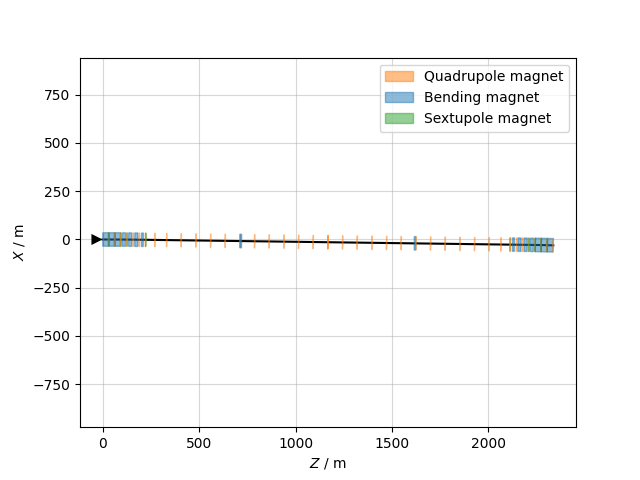

In [5]:
line.survey().plot()

In [6]:
# Arc cell strengths from previous match (to get boundary conditions)
env.vars.load_json('strengths_quads_00_arc_cell.json')

tw_uu = (2 * env['cell_u']).twiss4d()

In [7]:
kq_service_straight = [
    'kqfs0', 'kqds0', 'kqfs1', 'kqds2', 'kqfs3', 'kqds4',
    'kqfs5', 'kqdl1', 'kqfl2', 'kqdl2', 'kqfl3', 'kqdl3',
    'kqfl6', 'kqdl4', 'kqfl4', 'kqfl5', 'kqdl5', 'kqdl6']

In [8]:
# Initialize quadrupoles with a small strength
for nn in kq_service_straight:
    if line.vars.vary_default[nn]['limits'][1] > 1e-3: # Focusing quad
        line[nn] = 1e-3
    else: # Defocusing quad
        line[nn] = -1e-3

In [9]:
opt = line.match(
    solve=False,
    method='4d',
    default_tol=1e-5,
    vary=xt.VaryList(kq_service_straight, step=1e-6),
    betx=tw_uu.betx[0], bety=tw_uu.bety[0],
    alfx=tw_uu.alfx[0], alfy=tw_uu.alfy[0],
    dx=tw_uu.dx[0], dpx=tw_uu.dpx[0],
    targets=[
       xt.TargetSet(at='scenter::0', betx=env['bxsc'], bety=env['bysc'],
                          alfx=0, alfy=0,
                          dx=0, dpx=0),
       xt.TargetSet(at=xt.END,
                    betx=tw_uu.betx[0], bety=tw_uu.bety[0], alfx=0, alfy=0,
                    dx=tw_uu.dx[0], dpx=tw_uu.dpx[0],
                    mux = tw_uu.mux[-1] * 0.5 + 3.0,
                    muy = tw_uu.muy[-1] * 0.5 + 3.0),
       xt.TargetSet(at='qfs1a::0', betx=xt.LessThan(140.)),
       xt.TargetSet(at='qfs3a::0', betx=xt.LessThan(140), bety=xt.GreaterThan(25.)),
       xt.TargetSet(at='qfs5a::0', betx=xt.LessThan(190), bety=xt.GreaterThan(25.)),
       xt.TargetSet(at='qfl2a::0', betx=xt.LessThan(260)),
       xt.TargetSet(at='qfl3a::0', betx=xt.LessThan(env['bxmax']), bety=xt.GreaterThan(62)),
       xt.TargetSet(at='qfl6a::0', betx=xt.LessThan(env['bxmax'])),
       xt.TargetSet(at='qfl4a::0', betx=xt.LessThan(env['bxmax']), bety=xt.GreaterThan(65)),
       xt.TargetSet(at='qfl5a::0', betx=xt.LessThan(env['bxmax'])),
       xt.TargetSet(at='qds0a::0', bety=xt.LessThan(155)),
       xt.TargetSet(at='qds2a::0', bety=xt.LessThan(155)),
       xt.TargetSet(at='qds4a::0', bety=xt.LessThan(155)),
       xt.TargetSet(at='qdl1a::0', bety=xt.LessThan(235)),
       xt.TargetSet(at='qdl2a::0', bety=xt.LessThan(env['bymax'])),
       xt.TargetSet(at='qdl3a::0', bety=xt.LessThan(env['bymax'])),
       xt.TargetSet(at='qdl4a::0', bety=xt.LessThan(env['bymax'])),
       xt.TargetSet(at='qdl5a::0', bety=xt.LessThan(env['bymax'])),
       xt.TargetSet(at='qdl5a::2', bety=xt.LessThan(env['bymax'])),

       xt.TargetSet(at='qdl1a::0', dx=0, dpx=0, weight=10000),
       xt.TargetSet(at='qfl2a::0', dx=0, dpx=0, weight=10000),
       xt.TargetSet(at='qdl2a::0', betx=xt.GreaterThan(50)),
       xt.TargetSet(at='qfl6a::0', bety=xt.GreaterThan(70)),
       xt.TargetSet(at='qdl4a::0', betx=xt.GreaterThan(80)),
    ]      
)

In [10]:
opt.step(50)

                                             
Optimize - start penalty: 2.573e+05     
Matching: model call n. 1129               
Optimize - end penalty:  47.5985


In [11]:
opt.targets['END_mux'].weight = 1000
opt.targets['END_muy'].weight = 1000

In [12]:
opt.step(50)

                                             
Optimize - start penalty: 272.2            
Matching: model call n. 2264               
Optimize - end penalty:  42.072


In [13]:
opt.run_simplex(20000)

                                             
Optimize - start penalty: 42.07            
Matching: model call n. 18029                                  
Optimize - end penalty:  2.24019e-05


In [15]:
opt.target_status()

Target status:                              
id state tag             tol_met       residue   current_val target_val             description                                 
0  ON    scenter::0_betx    True  -4.17412e-06          80.9 80.9                   ('betx', 'scenter::0'), val=80.9, tol=1e ...
1  ON    scenter::0_bety    True    7.0475e-06         248.7 248.7                  ('bety', 'scenter::0'), val=248.7, tol=1 ...
2  ON    scenter::0_alfx    True   5.13426e-08   5.13426e-08 0                      ('alfx', 'scenter::0'), val=0, tol=1e-05 ...
3  ON    scenter::0_alfy    True  -2.06331e-08  -2.06331e-08 0                      ('alfy', 'scenter::0'), val=0, tol=1e-05 ...
4  ON    scenter::0_dx      True  -1.95783e-10  -1.95783e-10 0                      ('dx', 'scenter::0'), val=0, tol=1e-05,  ...
5  ON    scenter::0_dpx     True   1.21094e-11   1.21094e-11 0                      ('dpx', 'scenter::0'), val=0, tol=1e-05, ...
6  ON    END_betx           True   4.78333e-06      

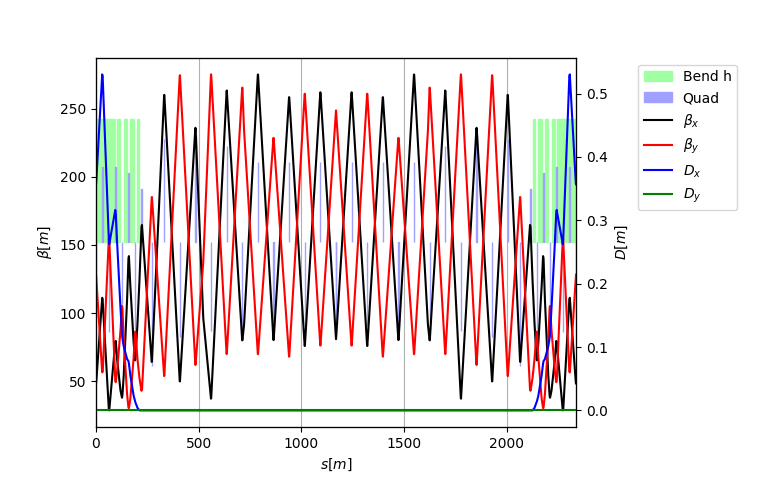

In [16]:
opt.plot()

In [18]:
strengths = opt.get_knob_values()
strengths

{'kqfs0': 0.013420859600592649,
 'kqds0': -0.015988259005992742,
 'kqfs1': 0.013372276721821959,
 'kqds2': -0.016754890426020505,
 'kqfs3': 0.012357195753858305,
 'kqds4': -0.016665275142788025,
 'kqfs5': 0.009418861381181342,
 'kqdl1': -0.02188365319930186,
 'kqfl2': 0.018305173803651136,
 'kqdl2': -0.01681711226359961,
 'kqfl3': 0.019044263188567452,
 'kqdl3': -0.01581757953916768,
 'kqfl6': 0.01707719524885219,
 'kqdl4': -0.015228103360694823,
 'kqfl4': 0.014235471906041863,
 'kqfl5': 0.014219505261828188,
 'kqdl5': -0.014922625066096325,
 'kqdl6': -0.014278411945363691}

In [ ]:
import json
with open('strengths_quads_06_straight.json', 'w') as fid:
    json.dump(strengths), fid, indent=1)